In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

### Analysing basic metrics

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [3]:
df.shape

(180, 9)

In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Non-Graphical Analysis: Value counts and unique attributes

In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
for i in df.columns:
    print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [48]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [61]:
def gender_given(Gender, print_marginal=False):
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][Gender]/df1.loc[Gender].sum()
    p_481 = df1['KP481'][Gender]/df1.loc[Gender].sum()
    p_281 = df1['KP281'][Gender]/df1.loc[Gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
        
        print(f"P(KP781/{Gender}): {p_781:.2f}")
        print(f"P(KP481/{Gender}): {p_481:.2f}")
        print(f"P(KP281/{Gender}): {p_281:.2f}\n")
        
gender_given('Male', True)
gender_given('Female', True)

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(Male): 0.58
P(Female): 0.42

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



### Visual Analysis - Univariate & Bivariate

In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<AxesSubplot:xlabel='Age'>

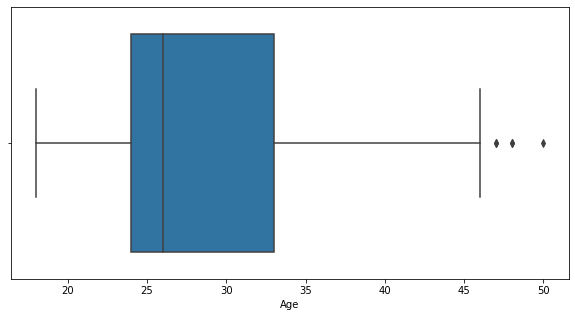

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Gender'>

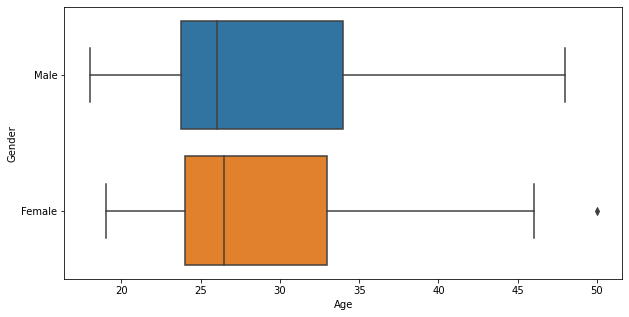

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Age', y='Gender')

<AxesSubplot:xlabel='Age', ylabel='Gender'>

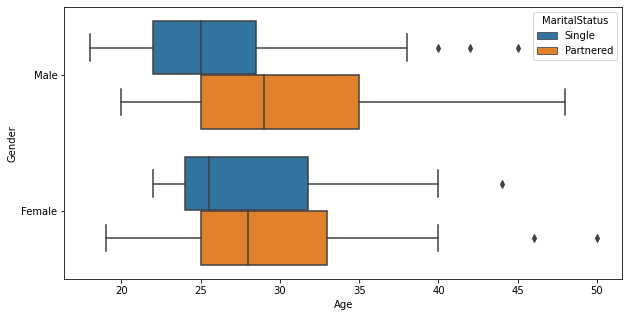

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Age', y='Gender', hue='MaritalStatus')

<AxesSubplot:xlabel='Product', ylabel='Income'>

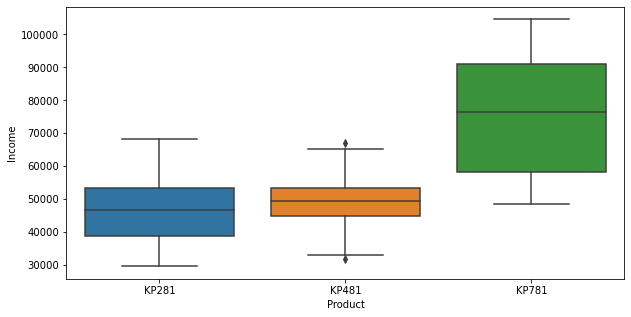

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Product', y='Income')

<AxesSubplot:xlabel='Product', ylabel='count'>

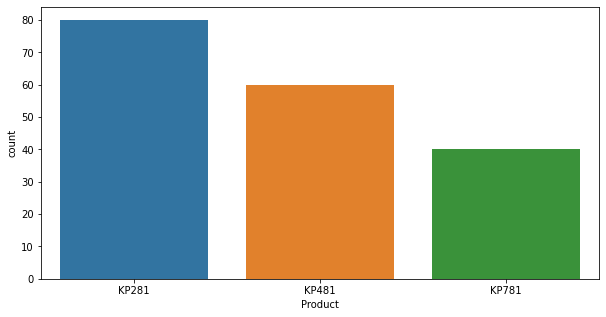

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product')

<AxesSubplot:xlabel='Product', ylabel='Count'>

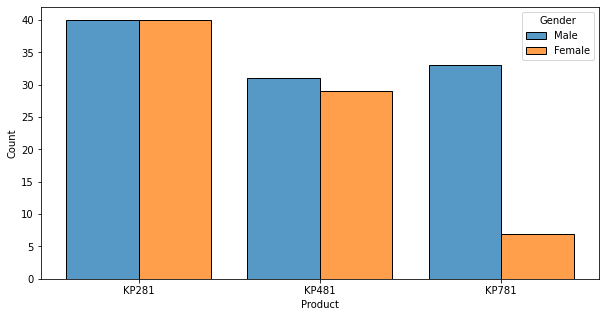

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Product', hue='Gender', multiple='dodge', shrink=0.8)
#sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Product', ylabel='Count'>

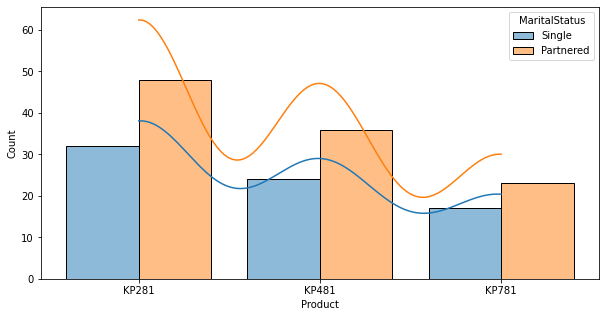

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Product', hue='MaritalStatus', multiple='dodge', shrink=0.8, kde=True)

<AxesSubplot:xlabel='Product', ylabel='Income'>

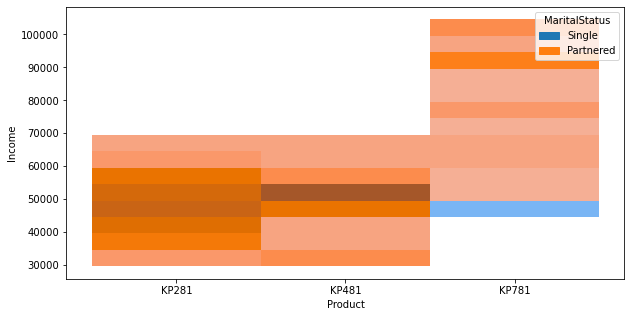

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Product',y = 'Income', hue='MaritalStatus', multiple='dodge', shrink=0.8, kde=True)

<Figure size 720x360 with 0 Axes>

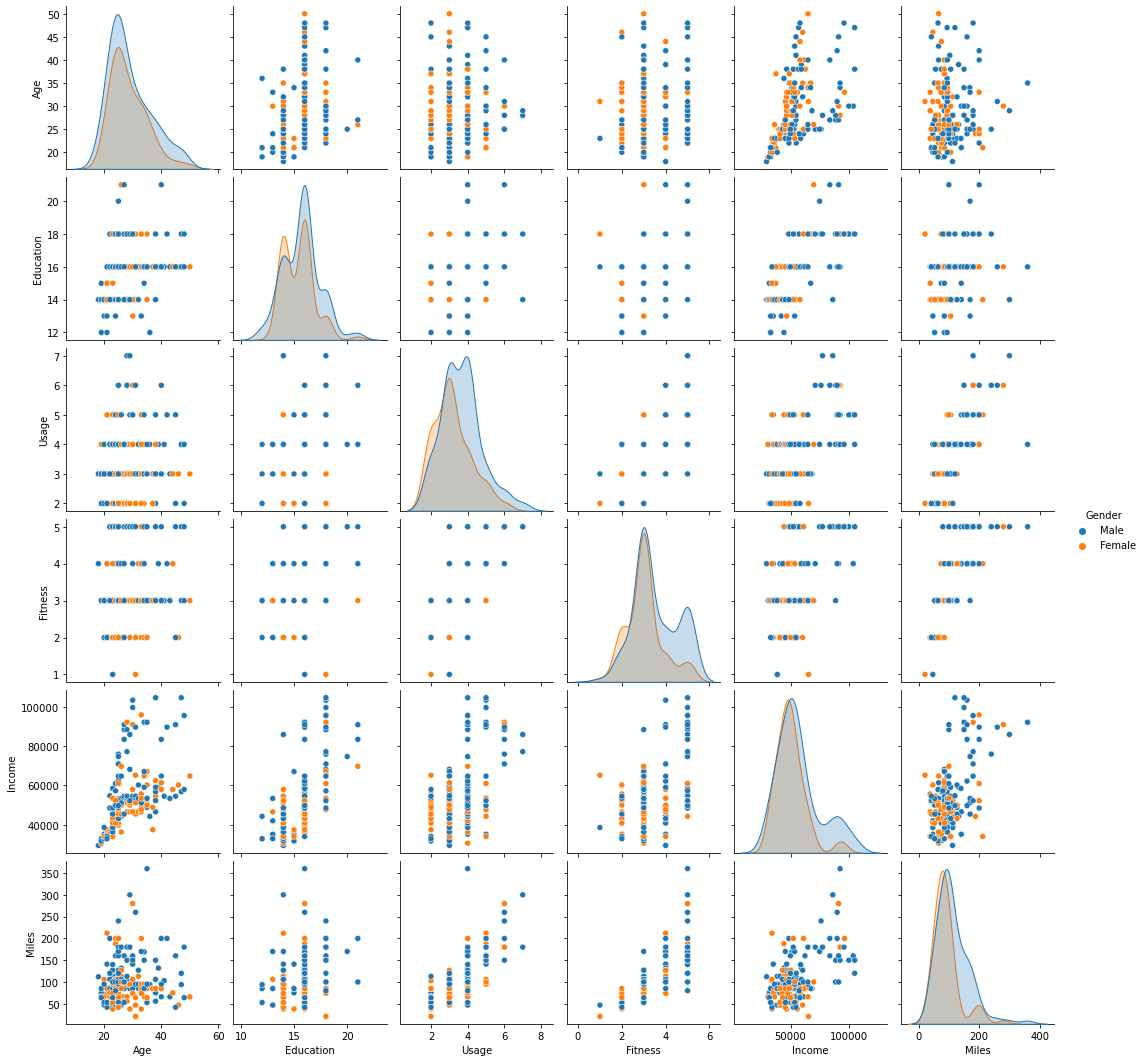

In [37]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue='Gender')

<AxesSubplot:>

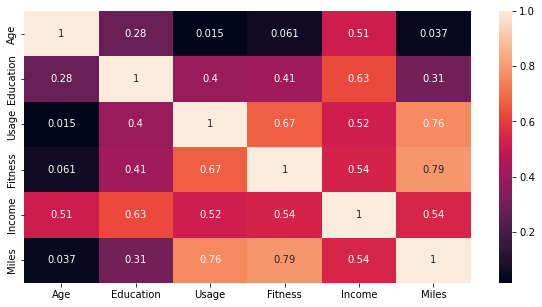

In [42]:
plt.figure(figsize=(10,5))
corr_data = df.corr()
sns.heatmap(corr_data, annot=True)

### Missing Value & Outlier Detection

In [45]:
#checking outliers in Age Column
Age_Q1 = df['Age'].quantile(0.25)
Age_Q3 = df['Age'].quantile(0.75)
IQR = Age_Q3 - Age_Q1
#Defining lower and upper bounds for outliers
lower = Age_Q1 - 1.5*IQR
upper = Age_Q3 + 1.5*IQR

#identifying the outliers
outliers = df[(df['Age']< lower) | (df['Age']> upper)]
#print('Age_Outliers:',outliers)
print(outliers)

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
78    KP281   47    Male         16     Partnered      4        3   56850   
79    KP281   50  Female         16     Partnered      3        3   64809   
139   KP481   48    Male         16     Partnered      2        3   57987   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
78      94  
79      66  
139     64  
178    120  
179    180  


### Business Insights based on Non-Graphical and Visual Analysis 
1. From the data we found that most of men are attracted to fitness as compared to women.
2. According to MaritalStatus, observed that partnered showed intrested to fitness.
3. Most of the people showed interested to purchase KP281 as compared to KP481 and KP781.
4. people interested in fitness for the Age below 45, its observed from outliers.

### Recommendations

1. Most of the people showed interested to product KP781 having advanced features, those having salary > 40000.
2. Most of people are having 16 years of education.
3. standard deviation for income and miles are high, theae might lead to outliers.
